Vamos importar algumas bibliotecas:

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from random import gauss

Vamos gerar alguns dados para representar a ocupação de leitos, para testar o modelo exponencial. 

In [51]:
n = 30
y0 = 30
alpha = 0.2
sigma = 0.1

t_data = np.linspace(1,n,n)
y_data = [y0*np.exp(alpha*t)*gauss(1,sigma) for t in t_data]
        
delta_y_data = [y_data[t+1] - y_data[t] for t in range(n - 1)]
        
y_data = np.array(y_data)
delta_y_data = np.array(delta_y_data)

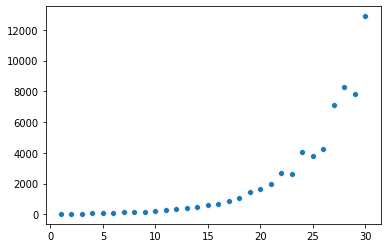

In [52]:
sns.scatterplot(t_data, y_data)

Plotamos a variação diária contra o número de casos (em uma escala logarítimica) para garantir que os dados criados têm uma tendência exponencial de fato. Isso é uma boa maneira de visualizar se o crescimento exponencial está parando ou não --- basta observar se o gráfico abaixo é uma linha reta. O único problema é representar variações negativas; por isso, talvez seja apropriado tomar a média temporal das mudanças.

<ipython-input-67-330eed2385e6>:1: RuntimeWarning: invalid value encountered in log
  sns.regplot(np.log(y_data[0:n-1]), np.log(delta_y_data))


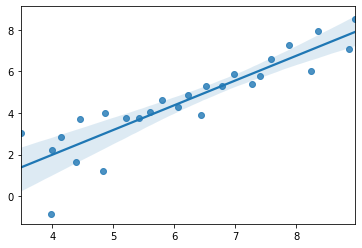

In [67]:
sns.regplot(np.log(y_data[0:n-1]), np.log(delta_y_data))

In [57]:
linearized_fit = np.polyfit(t_data, np.log(y_data), 1)
def y_model(t):
    return np.exp(linearized_fit[1]) * np.exp(linearized_fit[0]*t)

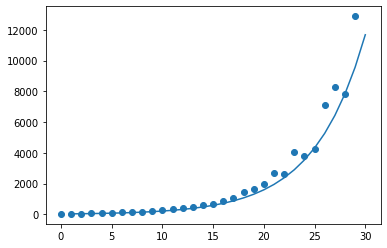

In [64]:
plt.plot(t_data, y_model(t_data), y_data, 'C0o')